# WEEK 6 : VISUALIZETIMESERIES

visualizing time series data
Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.

In [3]:
!python --version

Python 3.11.4


In [15]:
import pandas as pd
df1=pd.read_csv(r'C:\Users\Poojitha\Downloads\RollingSystemDemand_1to8.csv')
df1.head()

,HDR,ROLLING SYSTEM DEMAND,Unnamed: 2,Datetime
0,VD,2.022100e+13,22988.0,2.022102e+13
1,VD,2.022100e+13,23063.0,2.022102e+13
2,VD,2.022100e+13,23089.0,2.022102e+13
3,VD,2.022100e+13,23143.0,2.022102e+13
4,VD,2.022100e+13,23106.0,2.022102e+13


In [16]:
df2=pd.read_csv(r'C:\Users\Poojitha\Downloads\RollingSystemDemand_9to16.csv')
df2.head()

,HDR,ROLLING SYSTEM DEMAND,Unnamed: 2,Datetime
0,VD,2.022100e+13,24508.0,2.022101e+13
1,VD,2.022100e+13,24406.0,2.022101e+13
2,VD,2.022100e+13,24381.0,2.022101e+13
3,VD,2.022100e+13,24423.0,2.022101e+13
4,VD,2.022100e+13,24466.0,2.022101e+13


In [17]:

df=pd.concat([df1,df2])
df.head()

,HDR,ROLLING SYSTEM DEMAND,Unnamed: 2,Datetime
0,VD,2.022100e+13,22988.0,2.022102e+13
1,VD,2.022100e+13,23063.0,2.022102e+13
2,VD,2.022100e+13,23089.0,2.022102e+13
3,VD,2.022100e+13,23143.0,2.022102e+13
4,VD,2.022100e+13,23106.0,2.022102e+13


In [18]:
df

,HDR,ROLLING SYSTEM DEMAND,Unnamed: 2,Datetime
0,VD,2.022100e+13,22988.0,2.022102e+13
1,VD,2.022100e+13,23063.0,2.022102e+13
2,VD,2.022100e+13,23089.0,2.022102e+13
3,VD,2.022100e+13,23143.0,2.022102e+13
4,VD,2.022100e+13,23106.0,2.022102e+13
...,...,...,...,...
1724,VD,2.022100e+13,23203.0,2.022102e+13
1725,VD,2.022100e+13,23035.0,2.022102e+13
1726,VD,2.022100e+13,23065.0,2.022102e+13
1727,VD,2.022100e+13,23039.0,2.022102e+13


In [19]:
df.info()
df['Datetime']=pd.to_datetime(df['Datetime'], format='%Y%m%d%H%M%S')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 1728
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    3458 non-null   object 
 1   ROLLING SYSTEM DEMAND  3458 non-null   float64
 2   Unnamed: 2             3456 non-null   float64
 3   Datetime               3456 non-null   float64
dtypes: float64(3), object(1)
memory usage: 135.1+ KB


In [21]:
df

,HDR,ROLLING SYSTEM DEMAND,Unnamed: 2,Datetime
0,VD,2.022100e+13,22988.0,2022-10-17 00:00:00
1,VD,2.022100e+13,23063.0,2022-10-17 00:05:00
2,VD,2.022100e+13,23089.0,2022-10-17 00:10:00
3,VD,2.022100e+13,23143.0,2022-10-17 00:15:00
4,VD,2.022100e+13,23106.0,2022-10-17 00:20:00
...,...,...,...,...
1724,VD,2.022100e+13,23203.0,2022-10-16 23:40:00
1725,VD,2.022100e+13,23035.0,2022-10-16 23:45:00
1726,VD,2.022100e+13,23065.0,2022-10-16 23:50:00
1727,VD,2.022100e+13,23039.0,2022-10-16 23:55:00


In [22]:
#To rename the column name to power consumption
df.rename(columns={'Unnamed: 2': 'powerConsumption'}, inplace=True)

<AxesSubplot:xlabel='Datetime'>

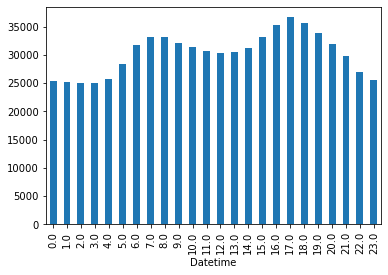

In [24]:
#Calculate average power consumption at each hour for all the days
df.groupby(df['Datetime'].dt.hour)['powerConsumption'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Datetime,Datetime'>

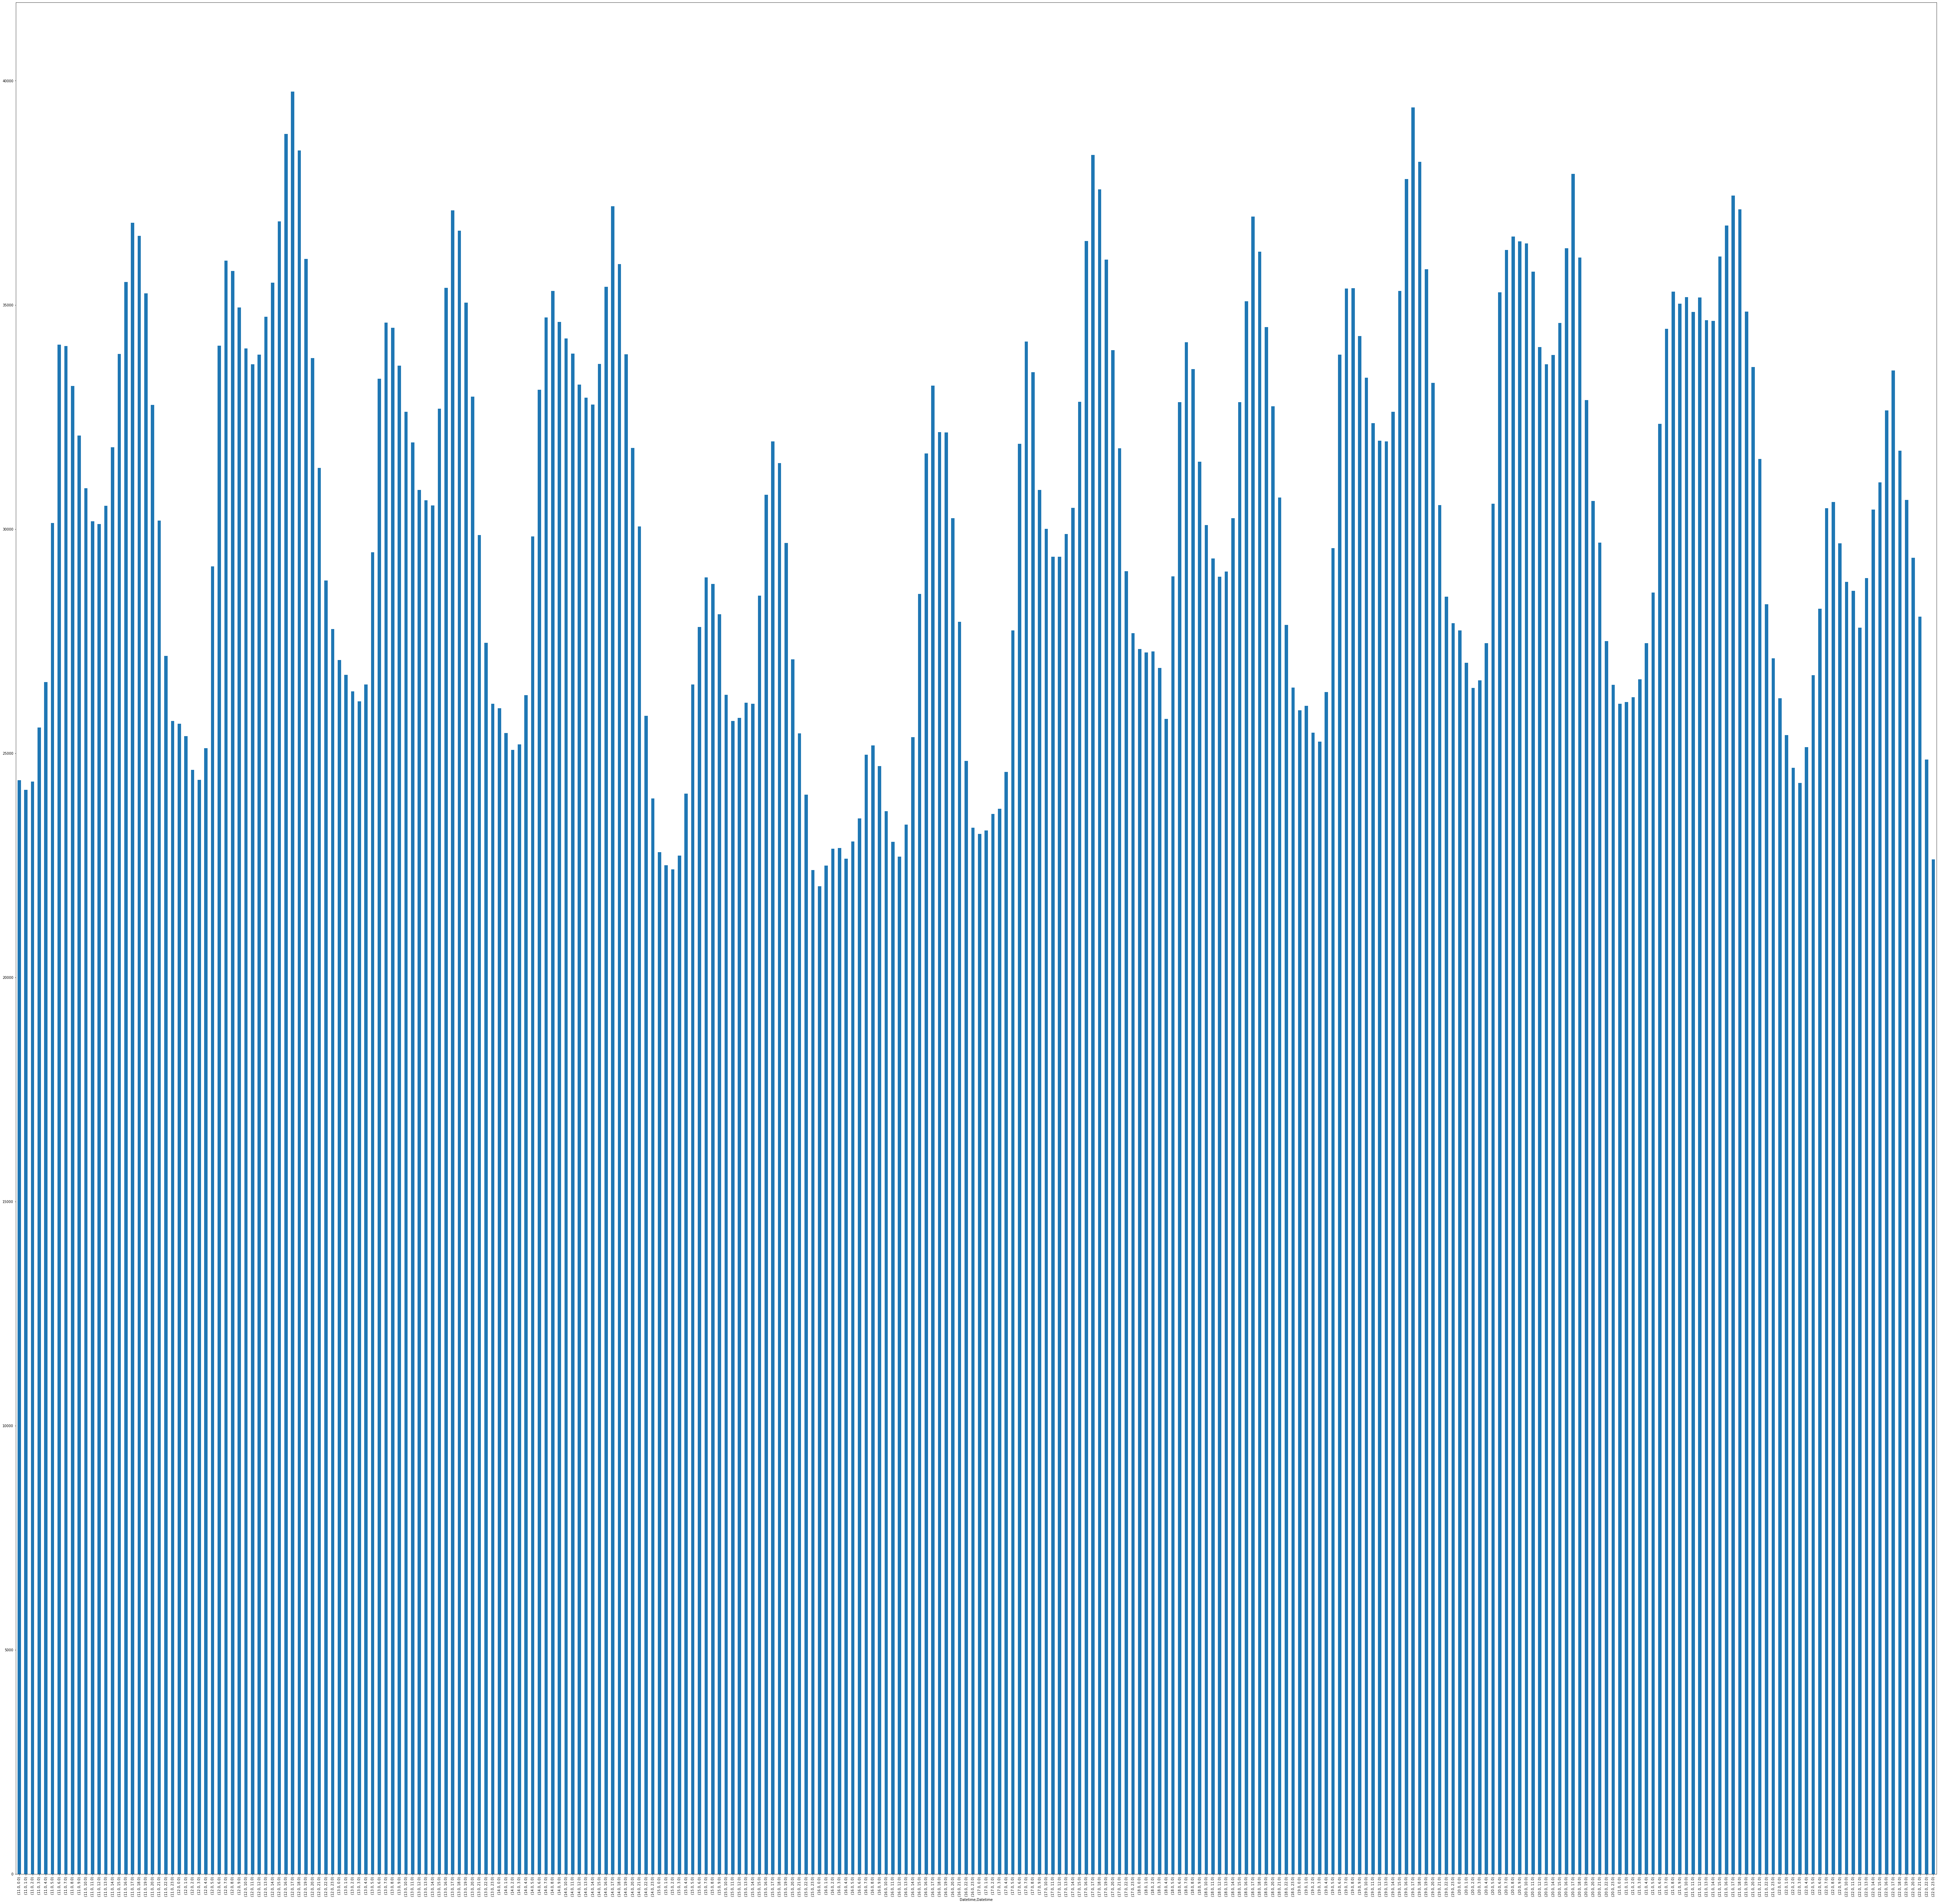

In [27]:
df.groupby([df['Datetime'].dt.day,df['Datetime'].dt.hour])['powerConsumption'].mean().plot(kind = 'bar',figsize=(100,100))